The dataset used in this notebook can be found in the folder of the project.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
salary_data = pd.read_csv("Salary_Data.csv")

<IPython.core.display.Javascript object>

In [4]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


As you can see we have 30 employees in the dataset with different number of years of experience. We are trying to make regressor so we can easily predict/decide on salary for totally new employee.

## Preprocessing

    1. We will need to separate data into Features and labels
    2. Create training and testing parts of the dataset
    
    In this situation we wont need to scale data because we have just one feature.

In [5]:
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, -1].values

### 2. Train and test set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Regression part

In [40]:
from sklearn.linear_model import LinearRegression, Ridge

In [41]:
lRegressor = LinearRegression()
lRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
rig = Ridge(alpha=1.0)
rig.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
pred_1 = lRegressor.predict(X_test)
pred_2 = rig.predict(X_test)

In [44]:
print("R^2 score for Linear Regression: ", lRegressor.score(X_test, y_test))

R^2 score for Linear Regression:  0.9495675634161453


In [45]:
print("R^2 score for Ridge regression: ", rig.score(X_test, y_test))

R^2 score for Ridge regression:  0.9504068686041522


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

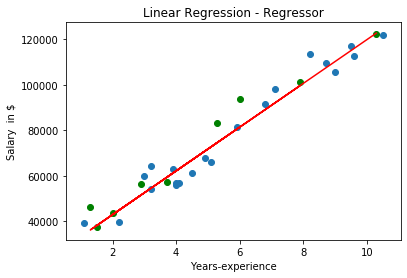

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

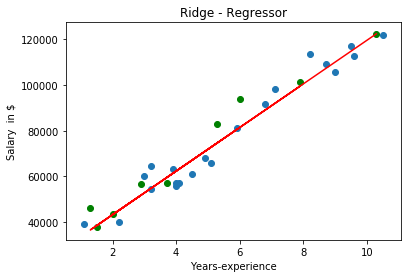

In [46]:
plt.scatter(X_test, y_test, c='g')
plt.scatter(X_train, y_train)
plt.plot(X_test, pred_1, c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()

plt.scatter(X_test, y_test, c='g')
plt.scatter(X_train, y_train)
plt.plot(X_test, pred_2, c='r')
plt.title("Ridge - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()

#### Let's try to improve Ridge regression with Grid Search CV

In [47]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [48]:
params = {'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'], 'max_iter':[1000, 10000]}

In [49]:
gs = GridSearchCV(rig, params, cv=5, verbose=10)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_iter=1000, solver=auto ......................................
[CV] .......... max_iter=1000, solver=auto, score=0.981, total=   0.0s
[CV] max_iter=1000, solver=auto ......................................
[CV] .......... max_iter=1000, solver=auto, score=0.920, total=   0.0s
[CV] max_iter=1000, solver=auto ......................................
[CV] .......... max_iter=1000, solver=auto, score=0.825, total=   0.0s
[CV] max_iter=1000, solver=auto ......................................
[CV] .......... max_iter=1000, solver=auto, score=0.969, total=   0.0s
[CV] max_iter=1000, solver=auto ......................................
[CV] .......... max_iter=1000, solver=auto, score=0.975, total=   0.0s
[CV] max_iter=1000, solver=svd .......................................
[CV] ........... max_iter=1000, solver=svd, score=0.981, total=   0.0s
[CV] max_iter=1000, solver=svd .......................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` para

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [1000, 10000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [51]:
print(gs.best_params_)

{'max_iter': 1000, 'solver': 'sag'}


In [52]:
improved_rig = Ridge(solver='auto', max_iter=1000, alpha=1.0)

In [53]:
improved_rig.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
print("R^2 on the Ridge regressor, tuned: ", improved_rig.score(X_test, y_test))

R^2 on the Ridge regressor, tuned:  0.9504068686041522


### Tree Regression

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dtr = DecisionTreeRegressor(max_depth=100)

In [57]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

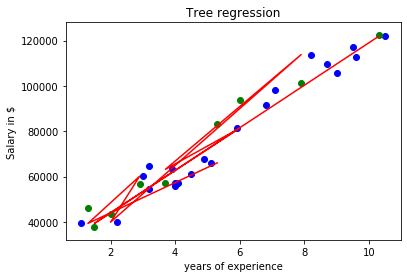

In [58]:
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='g')
plt.plot(X_test, dtr.predict(X_test), c='r')
plt.title("Tree regression")
plt.xlabel("years of experience")
plt.ylabel("Salary in $")
plt.show()

In [59]:
#pred_data= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': dtr.predict(X_test)})

In [60]:
print("R^2 score for Tree: ", dtr.score(X_test, y_test))

R^2 score for Tree:  0.8989995403421747


### Improve Tree with AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [62]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=100), n_estimators=300)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=100,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=300,
                  rando

In [63]:
ada_reg.predict(X_test)

array([121872.        ,  39891.        ,  81363.        ,  59899.54545455,
       109431.        ,  39891.        ,  59829.61538462,  39891.        ,
        67938.        ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

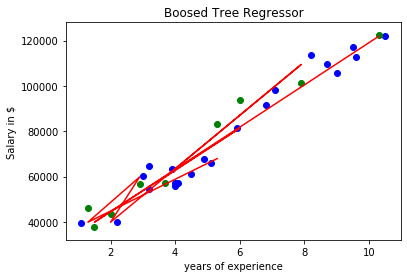

In [64]:
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='g')
plt.plot(X_test, ada_reg.predict(X_test), c='r')
plt.title("Boosed Tree Regressor")
plt.xlabel("years of experience")
plt.ylabel("Salary in $")
plt.show()

In [65]:
print("R^2 score for Tree boosted witha Ada: ", ada_reg.score(X_test, y_test))

R^2 score for Tree boosted witha Ada:  0.9254926479556133


By boosting Tree we achieved improvement of 2%.

### (Optional) Testing Liner Regression from scratch

In [66]:
from linear_regression_numpy import *

In [71]:
lr_numpy = LinearRegressioN()

In [72]:
lr_numpy.train(X_train, y_train)

(array([23149.54091122]), array([9701.52044075]))

In [76]:
pred_numpy_lr = lr_numpy.predict(X_test)
pred_numpy_lr

[array([123075.20145099]),
 array([37701.82157236]),
 array([81358.66355575]),
 array([59045.16654201]),
 array([99791.55239318]),
 array([42552.58179273]),
 array([51283.95018941]),
 array([35761.5174842]),
 array([74567.59924722])]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

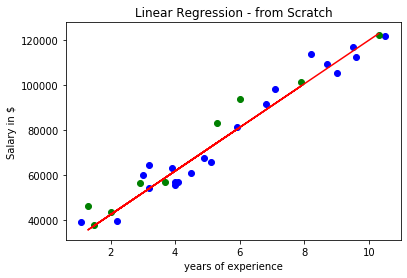

In [74]:
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='g')
plt.plot(X_test, pred_numpy_lr, c='r')
plt.title("Linear Regression - from Scratch")
plt.xlabel("years of experience")
plt.ylabel("Salary in $")
plt.show()